# COVID-19 Epitope Prediction using SARS/B-Cell Epitope Data

members:
- Donaire
- Gonzales
- Moncayo
- Pajaro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Importing SARS and B-Cell Epitope Data</h3>

In [2]:
sars_csv = pd.read_csv('input_sars.csv')
bcell_csv = pd.read_csv('input_bcell.csv')

sars = sars_csv.copy()
b_cell = bcell_csv.copy()

sars = sars.drop(['parent_protein_id','protein_seq','peptide_seq'],axis=1)
b_cell = b_cell.drop(['parent_protein_id','protein_seq','peptide_seq'],axis=1)

df = pd.concat([sars,b_cell], ignore_index=True)

In [3]:
df.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02,5.200000e+02,5.200000e+02,520.000000
mean,617.871154,635.876923,1.000442,1.719804,1.038960,1.278696,5.569763,1.163347e-01,-6.111554e-02,3.320512e+01,0.269231
std,349.582246,349.315328,0.087190,4.736354,0.037978,1.418791,0.000000,1.444680e-15,6.389930e-16,7.823496e-14,0.443987
min,1.000000,10.000000,0.621000,0.000000,0.908000,-7.467000,5.569763,1.163347e-01,-6.111554e-02,3.320512e+01,0.000000
25%,359.000000,373.750000,0.949000,0.179750,1.013000,0.534500,5.569763,1.163347e-01,-6.111554e-02,3.320512e+01,0.000000
50%,571.500000,592.500000,1.009000,0.439500,1.036000,1.412000,5.569763,1.163347e-01,-6.111554e-02,3.320512e+01,0.000000
75%,921.000000,940.000000,1.055250,1.181250,1.058000,2.245000,5.569763,1.163347e-01,-6.111554e-02,3.320512e+01,1.000000
max,1241.000000,1255.000000,1.317000,40.605000,1.228000,4.907000,5.569763,1.163347e-01,-6.111554e-02,3.320512e+01,1.000000


<h3>Plots</h3>

In [6]:
#sns.pairplot(df,hue='target')

<h3>Train and Test Split</h3>

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_features, df['target'], test_size=0.2)

<h3>Model creation using kNN</h3>

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [9]:
#First use accuracy rate to find out k value
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['target'],cv=10) # Cv=10, indicates 10 folds
    accuracy_rate.append(score.mean())

In [10]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['target'],cv=10)
    error_rate.append(1-score.mean())

Visualizations

Text(0, 0.5, 'Accuracy Rate')

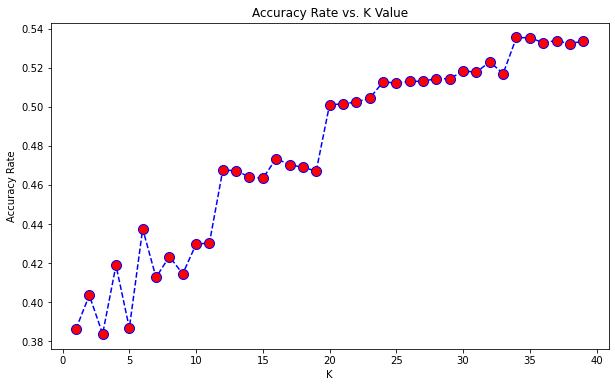

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

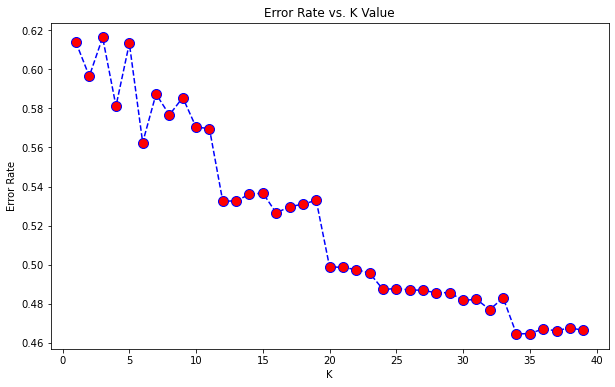

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h3>Creating the Actual Model</h3>

In [17]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[2018  154]
 [ 373  437]]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2172
           1       0.74      0.54      0.62       810

    accuracy                           0.82      2982
   macro avg       0.79      0.73      0.75      2982
weighted avg       0.82      0.82      0.81      2982



<h3>Prediction Making using COVID Data</h3>